In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gym.envs.registration.register(id='FrozenLake-v3', entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name':'4x4', 'is_slippery':False})
env = gym.make('FrozenLake-v3')

In [27]:
def learn(num_episodes=3000, discount_rate=0.9, mode='noise'):
    # Construct an empty table for Q values
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    rList = []
    for i in range(num_episodes):
    #   Reset environment to get start state
        cur_state = env.reset()
        rAll = 0
        done = False

        while not done:
    #       Choose action for the current state with some randomness
            if mode == 'noise':
                action = np.argmax(Q[cur_state, :] + np.random.randn(1, env.action_space.n) / (i+1))
            elif mode == 'e-greedy':
                if np.random.rand(1) < (1./(i//100 + 1)):
                    action = env.action_space.sample()
                else:
                    action = np.argmax(Q[cur_state, :])
            else:
                action = np.argmax(Q[cur_state, :])

    #       Get new state and reward
            new_state, reward, done, _ = env.step(action)

    #       Update Q table
            Q[cur_state, action] = reward + discount_rate * np.max(Q[new_state,:])

            rAll += reward
            cur_state = new_state
        
        rList.append(rAll)
    print("Success rate: " + str(sum(rList)/num_episodes))
    print("Final Q-TableValues")
    print("LEFT DOWN RIGHT UP")
    print(Q)
    plt.plot(range(len(rList)), rList, color='blue')
    plt.show()

Success rate: 0.9713333333333334
Final Q-TableValues
LEFT DOWN RIGHT UP
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.9     0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


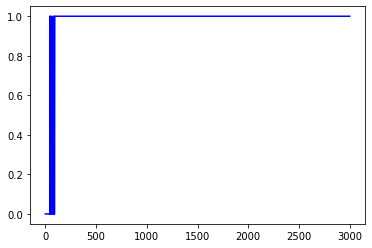

In [23]:
learn(mode='noise')

Success rate: 0.8643333333333333
Final Q-TableValues
LEFT DOWN RIGHT UP
[[0.531441   0.59049    0.4782969  0.531441  ]
 [0.531441   0.         0.43046721 0.4782969 ]
 [0.4782969  0.         0.38742049 0.43046721]
 [0.43046721 0.         0.38742049 0.        ]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.43046721]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.38742049]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [0.         0.         0.         0.        ]]


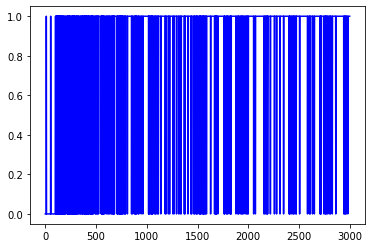

In [31]:
learn(mode='e-greedy')